<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/Algor%C3%ADtimos_para_SBCM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição de bibliotecas
Definição das bibliotecas e sobre a leitura dos dados 

In [0]:
import numpy as np
from sklearn import neighbors, metrics
import time
import os 
import os
import pathlib
from sklearn.datasets import load_sample_image

In [2]:
!rm -r  "/content/Music_Symbols/"

rm: cannot remove '/content/Music_Symbols/': No such file or directory


In [3]:
!git clone https://github.com/jenaroaaugusto/Music_Symbols.git

Cloning into 'Music_Symbols'...
remote: Enumerating objects: 4174, done.
remote: Counting objects: 100% (4174/4174), done.
remote: Compressing objects: 100% (2720/2720), done.
remote: Total 4174 (delta 1468), reused 4151 (delta 1452), pack-reused 0
Receiving objects: 100% (4174/4174), 2.91 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (1468/1468), done.


In [4]:
!ls "/content/Music_Symbols"

conjunto  Imagens  Notas.zip  README.md  Readme_Symbols.txt  Separadas


In [0]:
from zipfile import ZipFile
zf = ZipFile('/content/Music_Symbols/Notas.zip', 'r')
zf.extractall()
zf.close()

In [6]:
!ls "/content/"

ImagensAlvo_B.txt  Imagens_B.txt  Music_Symbols  TestesAlvo_B.txt  Testes_B.txt
ImagensAlvo_C.txt  Imagens_C.txt  sample_data	 TestesAlvo_C.txt  Testes_C.txt


In [0]:
arq_imagens = open('/content/Imagens_C.txt', 'r')

In [0]:
data = np.loadtxt(arq_imagens)
notess = data.view()


In [0]:
# from os import listdir
# from os.path import isfile, join
# import re
# import matplotlib.pyplot as plt

# mypath = '/content/Music_Symbols/conjunto/train' # edit with the path to your data

# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# print(files)

# x = []
# y = []

# for file in files:
#     label = file.split('_')[0] # assuming your img is named like this "eight_1.png" you want to get the label "eight"
#     y.append(label)
#     img = plt.imread(file)
#     x.append(img)

In [97]:
trainDir = os.path.join('/content/Music_Symbols/conjunto', 'train')
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.bmp')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)


/content/Music_Symbols/conjunto/train
3271
['ACCIDENTAL_Flat' 'ACCIDENTAL_DoubSharp' 'CLEF_Trebble' 'CLEF_Bass'
 'CLEF_Alto' 'ACCIDENTAL_Natural' 'ACCIDENTAL_Sharp']


In [98]:
testDir= os.path.join('/content/Music_Symbols/conjunto','val')
test_dir = pathlib.Path(""+testDir)
print(test_dir)
total_test = len(list(test_dir.glob('*/*.bmp')))
print(total_test)
CLASS_NAMEST=np.array(os.listdir(test_dir))
print(CLASS_NAMEST)

/content/Music_Symbols/conjunto/val
822
['ACCIDENTAL_Flat' 'ACCIDENTAL_DoubSharp' 'CLEF_Trebble' 'CLEF_Bass'
 'CLEF_Alto' 'ACCIDENTAL_Natural' 'ACCIDENTAL_Sharp']


In [99]:
CLASS_NAMES[0]

'ACCIDENTAL_Flat'

In [0]:
notes=[]


In [0]:
# !rm -r  "/content/Music_Symbols/"
from skimage import io
import cv2
from skimage.transform import resize
from sklearn.datasets import load_sample_image

In [102]:
for i in train_dir.iterdir():
  print(i)
  labea=np.array(os.listdir(i))
  print(len(labea))
  for j in i.iterdir():
    img = cv2.imread(j)
    img=img=cv2.resize(img,(28, 28), interpolation = cv2.INTER_AREA)
    # print(img.shape)
    if img.shape==(28,28):
      notes.append(img)
    else:
      print("Erro")
      print(j)
      print(img.shape)


/content/Music_Symbols/conjunto/train/ACCIDENTAL_Flat
413
/content/Music_Symbols/conjunto/train/ACCIDENTAL_DoubSharp
397
/content/Music_Symbols/conjunto/train/CLEF_Trebble
656
Erro
/content/Music_Symbols/conjunto/train/CLEF_Trebble/sol10.bmp
(28, 28, 3)
/content/Music_Symbols/conjunto/train/CLEF_Bass
439
/content/Music_Symbols/conjunto/train/CLEF_Alto
607
/content/Music_Symbols/conjunto/train/ACCIDENTAL_Natural
376
/content/Music_Symbols/conjunto/train/ACCIDENTAL_Sharp
384


In [41]:
len(notes)

3270

In [0]:
target_notes=[]
for i in range(413):
  target_notes.append(0)

for j in range(397):
  target_notes.append(1)

for k in range(654):
  target_notes.append(2)

for l in range(439):
  target_notes.append(3)

for m in range(607):
  target_notes.append(4)

for n in range(376):
  target_notes.append(5)

for o in range(384):
  target_notes.append(6)

In [51]:
print(len(target_notes))

target_notes = np.array(target_notes)

3270


In [0]:
notes = np.array(notes)

In [53]:
notes.shape

(3270, 28, 28)

In [54]:
target_notes.shape

(3270,)

In [0]:
notes_test=[]

In [57]:
for i in test_dir.iterdir():
  print(i)
  labea=np.array(os.listdir(i))
  print(len(labea))
  for j in i.iterdir():
    img = cv2.imread(j)
    img=img=cv2.resize(img,(28, 28), interpolation = cv2.INTER_AREA)
    # print(img.shape)
    if img.shape==(28,28):
      notes_test.append(img)
    else:
      print("Erro")
      print(j)
      print(img.shape)

/content/Music_Symbols/conjunto/val/ACCIDENTAL_Flat
104
/content/Music_Symbols/conjunto/val/ACCIDENTAL_DoubSharp
100
/content/Music_Symbols/conjunto/val/CLEF_Trebble
164
/content/Music_Symbols/conjunto/val/CLEF_Bass
110
/content/Music_Symbols/conjunto/val/CLEF_Alto
152
/content/Music_Symbols/conjunto/val/ACCIDENTAL_Natural
95
/content/Music_Symbols/conjunto/val/ACCIDENTAL_Sharp
97


In [0]:
notes_test=np.array(notes_test)


In [0]:
target_test=[]
for i in range(104):
  target_test.append(0)

for j in range(100):
  target_test.append(1)

for k in range(164):
  target_test.append(2)

for l in range(110):
  target_test.append(3)

for m in range(152):
  target_test.append(4)

for n in range(95):
  target_test.append(5)

for o in range(97):
  target_test.append(6)

In [0]:
target_test=np.array(target_test)

In [65]:
target_test.shape

notes_test.shape

(822, 28, 28)

#Testes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     479.0
           4       0.00      0.00      0.00     376.0
           5       0.00      0.00      0.00     397.0
           6       0.00      0.00      0.00     384.0

    accuracy                           0.00    1636.0
   macro avg       0.00      0.00      0.00    1636.0
weighted avg       0.00      0.00      0.00    1636.0


Confusion matrix:
[[  0   0   0   0   0]
 [479   0   0   0   0]
 [376   0   0   0   0]
 [397   0   0   0   0]
 [384   0   0   0   0]]


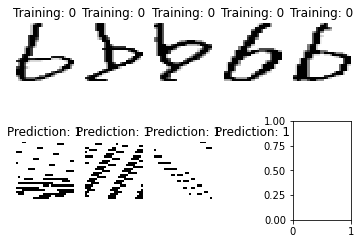

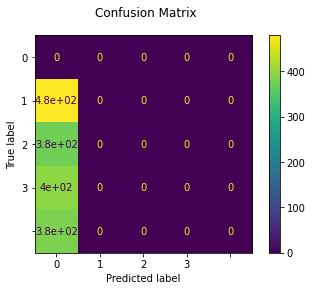

In [0]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(xy, legendas))
# print(digits.images[0])
# print(digits.target.shape)

for ax, (image, label) in zip(axes[0, :], images_and_labels[:8]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(arr)
data = arr.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, legendas, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(arr[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

#Novo carregar dados

In [0]:

def carrega_dados():
  trainDir = os.path.join('/content/Music_Symbols/conjunto', 'train')
  train_dir = pathlib.Path(""+trainDir)
  print(train_dir)
  total_train = len(list(train_dir.glob('*/*.bmp')))
  print(total_train)
  CLASS_NAMES=np.array(os.listdir(train_dir))
  print(CLASS_NAMES)
  testDir= os.path.join('/content/Music_Symbols/conjunto','val')
  test_dir = pathlib.Path(""+testDir)
  print(test_dir)
  total_test = len(list(test_dir.glob('*/*.bmp')))
  print(total_test)
  CLASS_NAMEST=np.array(os.listdir(test_dir))
  print(CLASS_NAMEST)

    return notes, notes_test, target_notes, target_test


#Carrega_dados

In [0]:
# def carrega_dados():
#     # Arquico que contém Imagens
#     arq_imagens = open('/content/Imagens_C.txt', 'r')
#     # Arquivo que contém Imagens para Teste
#     arq_teste = open('/content/Testes_C.txt', 'r')
#     # Arquivo que contém alvo das Imagens
#     arq_alvo_imagens = open('/content/ImagensAlvo_C.txt', 'r')
#     # Arquivo que contém alvo das Imagens para Teste
#     arq_alvo_testes = open('/content/TestesAlvo_C.txt', 'r')


#     # Carregando Imagens
#     data = np.loadtxt(arq_imagens)
#     notes = data.view()
#     notes.shape = (-1, 24, 24)
#     arq_imagens.close()
#     # print(notes[0])
#     # print(notes[1])

#     # Carreagando Images para Teste
#     data = np.loadtxt(arq_teste)
#     notes_test = data.view()
#     notes_test.shape = (-1, 24, 24)
#     arq_teste.close()
#     # print(notes_test[0])
#     # print(notes_test[1])

#     # Carregando alvo das Imagens
#     data = np.loadtxt(arq_alvo_imagens)
#     target_notes = data.view().astype(np.int)
#     arq_alvo_imagens.close()
#     # print(target_notes[0])
#     # print(target_notes[1])

#     # Carregando alvo das Imagens para teste
#     data = np.loadtxt(arq_alvo_testes)
#     target_test = data.view().astype(np.int)
#     arq_alvo_testes.close()
#     # print(target_test[0])
#     # print(target_test[1])

#     return notes, notes_test, target_notes, target_test

#Algortimo SVM_Notas
**Author:** Christoffer de Paula Oliveira

In [81]:
from sklearn import svm, metrics
# = carrega_dados()
# notes, notes_test, target_notes, target_test 

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = svm.SVC(gamma=0.001)

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Relatório de classificação para o classificador SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00       100
           2       0.20      1.00      0.33       164
           3       0.00      0.00      0.00       110
           4       1.00      0.01      0.01       152
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        97

    accuracy                           0.20       822
   macro avg       0.17      0.14      0.05       822
weighted avg       0.22      0.20      0.07       822




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
target_notes.size

3270

In [83]:
# notes, notes_test, target_notes, target_test = carrega_dados()

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = svm.SVC(gamma=0.001)

# Pegar tempo de execução
inicio = time.time()

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')



Relatório de classificação para o classificador SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00       100
           2       0.20      1.00      0.33       164
           3       0.00      0.00      0.00       110
           4       1.00      0.01      0.01       152
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        97

    accuracy                           0.20       822
   macro avg       0.17      0.14      0.05       822
weighted avg       0.22      0.20      0.07       822


Acurácia: 0.20072992700729927

Matrix de confusão:
[[  0   0 104   0   0   0   0]
 [  0   0 100   0   0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Algoritmo KNN_Notas
**Author:** Christoffer de Paula Oliveira

In [87]:
print(notes.shape)
print(notes_test.shape)

(3270, 28, 28)
(822, 28, 28)


In [84]:
# Author: Christoffer de Paula Oliveira

# Importando módulo que retorna os dados
# import Dados

# Importando Algoritmo SVM e Métricas para porcentagem de acertos e matriz de confusão.
# from sklearn import neighbors, metrics

# Importando Módulo prar obeter tempo de execução


# Carregando as notas musicais (Similar a função load_digits)

# notes, notes_test, target_notes, target_test = carrega_dados()

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vizinhos mais próximos
n_neighbors = 2

X = data
y = target_notes

# Pegar tempo de execução
inicio = time.time()

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = clf.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')

Relatório de classificação para o classificador KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       1.00      0.99      0.99       100
           2       0.94      0.98      0.96       164
           3       0.99      1.00      1.00       110
           4       0.96      0.98      0.97       152
           5       0.99      0.97      0.98        95
           6       0.98      0.91      0.94        97

    accuracy                           0.97       822
   macro avg       0.98      0.97      0.97       822
weighted avg       0.97      0.97      0.97       822


Acurácia: 0.9732360097323601

Matrix de confusão:
[[102   0   1   0   0   0   1]
 [  1  99   0   0   0   0   0]
 [  0   0 160   0   4   0   0]
 [  0   0   0 110   0 

#Algoritmo Rede Neural_Notas
**Author:** Christoffer de Paula Oliveira

In [69]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [71]:
print(tf.__version__)

1.15.2


In [72]:
# import numpy as np
import os # para criar pastas
# import tensorflow as tf

# criamos uma pasta para salvar o modelo
# if not os.path.exists('tmp'): # se a pasta não existir
#    os.makedirs('tmp') # cria a pasta

# Importando módulo que retorna os dados
# import Dados

# Importando Métricas para porcentagem de acertos e matriz de confusão.
from sklearn import metrics

def accuracy(pred_y, true_y):
    '''Compara dois vetores one-hot para produzir a acurácia'''

    pred_labels = np.argmax(pred_y, 1)  # acha o dígito de maior prob. prevista
    true_labels = np.argmax(true_y, 1)  # acha o dígito verdadeiro

    return (pred_labels == true_labels).mean() * 100  # compara ambos


# definindo constantes
lr = 0.01  # taxa de aprendizado
n_iter = 1000  # número de iterações de treino
batch_size = 128  # qtd de imagens no mini-lote (para GDE)
n_inputs = 24 * 24  # número de variáveis (pixeis)
n_l1 = 512  # número de neurônios da primeira camada
n_l2 = 512  # número de neurônios da segunda camada
n_outputs = 7  # número classes (dígitos)

# Peganod e dimencionando dados
notes, notes_test, target_notes, target_test = carrega_dados()
n_exemplos = len(notes)
n_exemplos_teste = len(notes_test)
data_sklearn = notes.reshape((n_exemplos, -1))
data_sklearn_teste = notes_test.reshape((n_exemplos_teste, -1))

graph = tf.Graph()  # cria um grafo
with graph.as_default():  # abre o grafo para que possamos colocar nós

    # Camadas de Inputs
    with tf.name_scope('input_layer'):  # escopo de nome da camada de entrada
        x_input = tf.placeholder(tf.float32, [None, n_inputs], name='images')
        y_input = tf.placeholder(tf.int64, [None], name='labels')

    # Camada 1
    with tf.name_scope('first_layer'):  # escopo de nome da primeira camada
        # variáveis da camada
        W1 = tf.Variable(tf.truncated_normal([n_inputs, n_l1]), name='Weights')
        b1 = tf.Variable(tf.zeros([n_l1]), name='bias')

        l1 = tf.add(tf.matmul(x_input, W1), b1, name='linear_transformation')
        l1 = tf.nn.relu(l1, name='relu')

    # Camada 2
    with tf.name_scope('second_layer'):  # escopo de nome da segunda camada
        # variáveis da camada
        W2 = tf.Variable(tf.truncated_normal([n_l1, n_l2]), name='Weights')
        b2 = tf.Variable(tf.zeros([n_l2]), name='bias')

        l2 = tf.add(tf.matmul(l1, W2), b2, name='linear_transformation')
        l2 = tf.nn.relu(l2, name='relu')

    # Camada de saída
    with tf.name_scope('output_layer'):  # escopo de nome da camada de saída
        # variáveis da camada
        Wo = tf.Variable(tf.truncated_normal([n_l2, n_outputs]), name='Weights')
        bo = tf.Variable(tf.zeros([n_outputs]), name='bias')

        scores = tf.add(tf.matmul(l2, Wo), bo, name='linear_transformation')  # logits
        y_hat = tf.nn.softmax(scores) # Converte scorer em probabilidades
        error = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_input, logits=scores),
            name='error')

    # calcula acurácia
    correct = tf.nn.in_top_k(scores, y_input, 1)  # calcula obs corretas (vetor bools V ou F)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))  # converte de bool para float32

    # otimizador
    optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(error)

    # inicializador
    init = tf.global_variables_initializer()

    # para salvar o modelo treinado
    saver = tf.train.Saver()

# abrimos a sessão tf
with tf.Session(graph=graph) as sess:
    init.run()  # iniciamos as variáveis

    # loop de treinamento
    for step in range(n_iter + 1):

        # cria os mini-lotes
        x_batch = data_sklearn[: 200]
        y_batch = target_notes[: 200]

        # cria um feed_dict
        feed_dict = {x_input: x_batch, y_input: y_batch}

        # executa uma iteração de treino e calcula o erro
        l, _ = sess.run([error, optimizer], feed_dict=feed_dict)

        # mostra o progresso a cada 1000 iterações
        if step % 1000 == 0:

            # pega alguns dados de validação
            x_valid = data_sklearn[: 100]
            y_valid = target_test[: 100]

            val_dict = {x_input: x_valid, y_input: y_valid}  # monta o feed_dict

            # executa o nó para calcular a acurácia
            error_np, acc = sess.run([error, accuracy], feed_dict=val_dict)

            print('Erro de treino na iteração %d: %.2f' % (step, l))
            print('Erro de validação na iteração %d: %.2f' % (step, error_np))
            print('Acurácia de validação na iteração %d: %.2f\n' % (step, acc))

            # salva as variáveis do modelo
            saver.save(sess, "deep_ann.ckpt")

# restaurando modelo pra fazer previsões
with tf.Session(graph=graph) as sess:
    # restauramos o valor das variáveis
    saver.restore(sess, "deep_ann.ckpt", )

    x_test = data_sklearn_teste
    y_test = target_test

    val_dict = {x_input: x_test, y_input: y_test}
    error_np, acc = sess.run([error, accuracy], feed_dict=val_dict)

    classification = sess.run(tf.argmax(scores, 1), feed_dict={x_input: x_test})
    print(acc)

expected = y_test
predicted = classification
print("Relatório de classificação para o classificador %s:\n%s\n"
       % (classification, metrics.classification_report(expected, predicted)))
print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

NameError: ignored

#Gaussian Naive_Bayes
**Author:** Christoffer de Paula Oliveira

In [73]:
# Author: Christoffer de Paula Oliveira
from sklearn.naive_bayes import GaussianNB

# Carregando as notas musicais (Similar a função load_digits)
# = carrega_dados()
notes, notes_test, target_notes, target_test 

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = GaussianNB()

# Pegar tempo de execução
inicio = time.time()

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')

Relatório de classificação para o classificador GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.78      0.91      0.84       100
           2       0.88      0.80      0.84       164
           3       0.83      0.94      0.88       110
           4       0.89      0.78      0.84       152
           5       0.82      0.73      0.77        95
           6       0.78      0.86      0.81        97

    accuracy                           0.84       822
   macro avg       0.83      0.84      0.83       822
weighted avg       0.84      0.84      0.84       822


Acurácia: 0.8357664233576643

Matrix de confusão:
[[ 91   2   0   0   4   5   2]
 [  3  91   0   0   2   3   1]
 [  0   4 131  14   3   3   9]
 [  0   0   0 103   4   2   1]
 [ 11   7   9   1 119   1   4]
 [  0   7   6   6   0  69   7]
 [  3   6   3   0   1   1  83]]
Tempo de execução: 0.04577231407165527


#Multinominal Naive_Bayes
**Author:** Christoffer de Paula Oliveira

In [75]:
# Author: Christoffer de Paula Oliveira

# # Importando módulo que retorna os dados
# import Dados

# # Importando Algoritmo SVM e Métricas para porcentagem de acertos e matriz de confusão.
# from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Importando Módulo prar obeter tempo de execução
import time

# Carregando as notas musicais (Similar a função load_digits)
# = carrega_dados()

notes, notes_test, target_notes, target_test 
# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = MultinomialNB()

# Pegar tempo de execução
inicio = time.time()

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')

Relatório de classificação para o classificador MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       104
           1       0.80      0.87      0.83       100
           2       0.86      0.88      0.87       164
           3       0.95      0.91      0.93       110
           4       0.86      0.84      0.85       152
           5       0.86      0.69      0.77        95
           6       0.72      0.90      0.80        97

    accuracy                           0.84       822
   macro avg       0.84      0.84      0.84       822
weighted avg       0.85      0.84      0.84       822


Acurácia: 0.843065693430657

Matrix de confusão:
[[ 82   4   3   1   6   3   5]
 [  2  87   2   0   5   1   3]
 [  2   6 144   0   2   4   6]
 [  0   0   0 100   5   2   3]
 [  7   3   5   0 127   0  10]
 [  1   7  10   4   1  66   6]
 [  1   2   4   0   2   1  87]]
Tempo de execução: 0.063054

#Complement Naive_Bayes
**Author:** Christoffer de Paula Oliveira

In [76]:
# Carregando as notas musicais (Similar a função load_digits)
from sklearn.naive_bayes import ComplementNB
# = carrega_dados()
notes, notes_test, target_notes, target_test 

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = ComplementNB()

# Pegar tempo de execução
inicio = time.time()

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')

Relatório de classificação para o classificador ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False):
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       104
           1       0.66      0.90      0.76       100
           2       0.79      0.90      0.84       164
           3       0.83      0.95      0.89       110
           4       0.96      0.60      0.74       152
           5       0.80      0.66      0.72        95
           6       0.84      0.75      0.79        97

    accuracy                           0.79       822
   macro avg       0.80      0.79      0.79       822
weighted avg       0.81      0.79      0.79       822


Acurácia: 0.791970802919708

Matrix de confusão:
[[ 82   9   1   2   1   8   1]
 [  2  90   5   1   1   0   1]
 [  2  10 147   0   1   3   1]
 [  0   0   2 105   0   2   1]
 [ 21  17  11   6  91   0   6]
 [  1   7  10  10   0  63   4]
 [  5   3   9   3   1   3  73]]
Tempo de execuçã

#Bernoulli Naive_Bayes
**Author:** Christoffer de Paula Oliveira

In [77]:
# # Importando módulo que retorna os dados
# import Dados

# Importando Algoritmo SVM e Métricas para porcentagem de acertos e matriz de confusão.
# from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

# Importando Módulo prar obeter tempo de execução
# import time

# Carregando as notas musicais (Similar a função load_digits)
# = carrega_dados()
notes, notes_test, target_notes, target_test 

# Para aplicar um classificador a esses dados, precisamos nivelar a imagem para
# transformar os dados em uma matriz (amostras, recurso):
n_samples = len(notes)
n_samples_teste = len(notes_test)

data = notes.reshape((n_samples, -1))
data_teste = notes_test.reshape((n_samples_teste, -1))

# Criar um classificador: um classificador de vetores de suporte
classifier = BernoulliNB()

# Pegar tempo de execução
inicio = time.time()

# Aprendemos os dígitos na primeira metade dos dígitos

classifier.fit(data, target_notes)

# Aprendemos as notas para aprendizagem, ou seja, 70% dos dados

# Agora, preveja as notas com o restante dos dados, isto é, 30%
expected = target_test
predicted = classifier.predict(data_teste)

fim = time.time()

print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print(f'Acurácia: {metrics.accuracy_score(expected, predicted)}\n')

print("Matrix de confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

print(f'Tempo de execução: {fim - inicio}')

Relatório de classificação para o classificador BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       104
           1       0.83      0.88      0.85       100
           2       0.82      0.85      0.84       164
           3       0.98      0.94      0.96       110
           4       0.82      0.86      0.84       152
           5       0.80      0.72      0.76        95
           6       0.77      0.87      0.82        97

    accuracy                           0.84       822
   macro avg       0.84      0.83      0.84       822
weighted avg       0.84      0.84      0.84       822


Acurácia: 0.8394160583941606

Matrix de confusão:
[[ 76   1   6   1  11   5   4]
 [  2  88   2   0   5   1   2]
 [  1   6 140   0   5   6   6]
 [  0   0   1 103   3   2   1]
 [  5   5   5   0 131   1   5]
 [  0   4  12   1   3  68   7]
 [  2   2   5   0   2   2  84]]
Tempo de execu

#Nova Rede Neural 


In [79]:
import numpy as np
import tensorflow as tf
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
from datetime import datetime

# He et al. initialization from https://arxiv.org/abs/1502.01852
he_init = tf.contrib.layers.variance_scaling_initializer()


# This class inherits from Sklearn's BaseEstimator and ClassifierMixin
class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=4, n_neurons=50, optimizer_class=tf.train.AdamOptimizer, learning_rate=0.01,
                 batch_size=20, activation=tf.nn.elu, initializer=he_init, batch_norm_momentum=None, dropout_rate=None,
                 max_checks_without_progress=20, show_progress=10, tensorboard_logdir=None, random_state=None):

        # Initialize the class with sensible default hyperparameters
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.max_checks_without_progress = max_checks_without_progress
        self.show_progress = show_progress
        self.random_state = random_state
        self.tensorboard_logdir = tensorboard_logdir
        self._session = None  # Instance variables preceded by _ are private members

    def _dnn(self, inputs):
        '''This method builds the hidden layers and
         Provides for implementation of batch normalization and dropout'''

        for layer in range(self.n_hidden_layers):

            # Apply dropout if specified
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, rate=self.dropout_rate, training=self._training)
            # Create the hidden layer
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     activation=self.activation,
                                     kernel_initializer=self.initializer,
                                     name="hidden{}".format(layer + 1))

            # Apply batch normalization if specified
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)

            # Apply activation function
            inputs = self.activation(inputs, name="hidden{}_out".format(layer+1))
        return inputs

    def _construct_graph(self, n_inputs, n_outputs):
        '''This method builds the complete Tensorflow computation graph
            n_inputs: number of features
            n_outputs: number of classes
        '''

        if self.random_state:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        # Placeholders for training data, labels are class exclusive integers
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

        # Create a training placeholder
        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=[], name="training")
        else:
            self._training = None

        # Output after hidden layers
        pre_output = self._dnn(X)

        # Outputs from output layer
        logits = tf.layers.dense(pre_output, n_outputs, kernel_initializer=he_init, name="logits")
        probabilities = tf.nn.softmax(logits, name="probabilities")

        ''' Cost function is cross entropy and loss is average cross entropy. Sparse softmax must be used because shape 
        of logits is [None, n_classes] and shape of labels is [None]'''
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        '''Optimizer and training operation. The control dependency is necessary for implementing batch normalization. 
        The training operation must be dependent on the batch normalization.'''

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            training_op = optimizer.minimize(loss)

        # Metrics for evaluation
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf. float32),name="accuracy")

        # Initializer and saver
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        if self.tensorboard_logdir:
            now = datetime.utcnow().strftime('%Y%m%d-%H%M%S')
            tb_logdir = self.tensorboard_logdir + "/run-{}".format(now)
            cost_summary = tf.summary.scalar("validation_loss", loss)
            acc_summary = tf.summary.scalar("validation_accuracy", accuracy)
            merged_summary = tf.summary.merge_all()
            file_writer = tf.summary.FileWriter(tb_logdir, tf.get_default_graph())

            self._merged_summary = merged_summary
            self._file_writer = file_writer

        self._X, self._y = X, y
        self._logits = logits
        self._probabilities = probabilities
        self._loss = loss
        self._training_op = training_op
        self._accuracy = accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_parameters(self):
        # Retrieves the value of all the variables in the network
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in
                zip(gvars, self._session.run(gvars))}

    def _restore_model_parameters(self, model_params):
        # Restores the value of all variables using tf assign operations
        # First retrieve the list of all the graph variables
        gvar_names = list(model_params.keys())

        # Then retrieve all the assignment operations in the graph
        assign_ops = {gvar_name: self._graph.get_operation_by_name( gvar_name + "/Assign") for gvar_name in gvar_names}

        # Fetch the initialization values of the assignment operations
        '''graph.get_operation_by_name(operation).inputs returns the input to the given operation; because these are all
         assignment operations, the second argument to inputs is the value assigned to the variable'''
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op 			  in assign_ops.items()}
        # Create a dictionary mapping initial values to values after training
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        # Assign the trained value to all the variables in the graph
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        # Method to train the model. Implements early stopping if validation data is provided

        self.close_session()
        n_inputs = X.shape[1] # Number of features

        # If labels are provided in one_hot form, convert to integer class labels
        y = np.array(y)
        y_valid = np.array(y_valid)

        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)

        if len(y_valid.shape) == 2:
            y_valid = np.argmax(y_valid, axis=1)

        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_) # Number of classes

        # Tensorflow expects labels from 0 to n_classes - 1.
        self.class_to_index_ = {label: index for index, label in enumerate(self.classes_)}
        labels = [self.class_to_index_[label] for label in y]
        y = np.array(labels, dtype=np.int32)

        self._graph = tf.Graph()

        # Build the computation graph with self as default graph
        with self._graph.as_default():
            self._construct_graph(n_inputs, n_outputs)

        # Early stopping parameters
        checks_without_progress = 0
        best_loss = np.float("inf")
        best_parameters = None

        self._session = tf.Session(graph=self._graph)

        with self._session.as_default() as sess:
            # Initialize all variables
            self._init.run()
            num_instances = X.shape[0] # Total number of training instances
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(num_instances)
                for rnd_indices in np.array_split(rnd_idx, num_instances // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    train_acc, _ = sess.run([self._accuracy, self._training_op], 					feed_dict)

                # Early stopping implementation
                if X_valid is not None and y_valid is not None:
                    feed_dict_valid = {self._X: X_valid, self._y: y_valid}

                    # Write summary for tensorboard
                    if self.tensorboard_logdir:
                        val_acc, val_loss, summary = sess.run([self._accuracy, self.
                                                              _loss, self._merged_summary], feed_dict=feed_dict_valid)

                        self._file_writer.add_summary(summary, epoch)

                    else:
                        val_acc, val_loss = sess.run([self._accuracy, self._loss], feed_dict=feed_dict_valid)

                    # Show training progress every show_progress epochs
                    if self.show_progress:
                        if epoch % self.show_progress == 0:
                            print("Epoch: {} Current training accuracy: {:.4f} Validation Accuracy: {:.4f} Validation Loss {:.6f}".format(
                                epoch+1, train_acc, val_acc, val_loss))

                    # Check to see if model is improving
                    if val_loss < best_loss:
                        best_loss = val_loss
                        checks_without_progress = 0
                        best_parameters = self._get_model_parameters()
                    else:
                        checks_without_progress += 1

                    if checks_without_progress > self.max_checks_without_progress:
                        print("Stopping Early! Loss has not improved in {} epochs".format(
                            self.max_checks_without_progress))
                        break

                # No validation set provided
                else:
                    if self.show_progress:
                        if epoch % self.show_progress == 0:
                            print("Epoch: {} Current training accuracy: {:.4f}".format(
                                epoch+1, train_acc))

            # In the case of early stopping, restore the best weight values
            if best_parameters:
                self._restore_model_parameters(best_parameters)
                return self

    def predict_probabilities(self, X):
        # Predict the probabilities of each class
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._probabilities.eval(feed_dict={self._X: X})

    def predict(self, X):
        # Predict the classes themselves and return with shape=(None,)
        class_indices = np.argmax(self.predict_probabilities(X), axis=1)
        predictions = np.array([[self.classes_[class_index]] for class_index in class_indices], dtype=np.int32)
        return np.reshape(predictions, (-1,))

    def save(self, path):
        # Save the model to provided path
        self._saver.save(self._session, path)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [80]:
from sklearn.metrics import accuracy_score
# from dnn_classifier import DNNClassifier
# import Dados
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Carregando as notas musicais (Similar a função load_digits)

# notes, notes_test, target_notes, target_test = carrega_dados()

# notes, notes_test, target_notes, target_test 
n_exemplos = len(notes)
n_exemplos_teste = len(notes_test)
data_sklearn = notes.reshape((n_exemplos, -1))
data_sklearn_teste = notes_test.reshape((n_exemplos_teste, -1))

X_train = data_sklearn
y_train = target_notes

X_validation = data_sklearn[: 100]
y_validation = data_sklearn_teste[: 100]

X_test = data_sklearn_teste
y_test = target_test

dnn = DNNClassifier(show_progress=None, random_state=42)

parameter_distributions = {
    'n_hidden_layers': [3, 4, 5],
    'n_neurons': [40, 50, 100],
    'batch_size': [64, 128]
}

random_search = RandomizedSearchCV(dnn, parameter_distributions, n_iter=15, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)

best_notas_dnn = random_search.best_estimator_
mnist_predictions = best_notas_dnn.predict(X_test)

print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, mnist_predictions) * 100))

print(random_search.best_params_)


random_search.best_estimator_.save("models/mnist_random_best_model")

'''parameter_grid = {
    'n_hidden_layers': [3],
    'n_neurons': [75, 100, 125, 150],
    'batch_size': [64],
    'learning_rate':[0.005],
    'activation': [tf.nn.elu],
    'max_checks_without_progress': [20, 25],
    'batch_norm_momentum': [0.9, 0.95],
}

grid_search = GridSearchCV(dnn, parameter_grid, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


grid_search.best_params_
predictions = grid_search.best_estimator_.predict(X_test)

print("Score on test set: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))

random_search.best_estimator_.save("models/mnist_grid_best_model")'''



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_neurons=100, n_hidden_layers=3, batch_size=128 ................
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_neurons=100, n_hidden_layers=3, batch_size=128, total=   8.3s
[CV] n_neurons=100, n_hidden_layers=3, batch_size=128 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV] . n_neurons=100, n_hidden_layers=3, batch_size=128, total=   7.8s
[CV] n_neurons=100, n_hidden_layers=3, batch_size=128 ................
[CV] . n_neurons=100, n_hidden_layers=3, batch_size=128, total=   8.1s
[CV] n_neurons=100, n_hidden_layers=3, batch_size=128 ................
[CV] . n_neurons=100, n_hidden_layers=3, batch_size=128, total=   7.9s
[CV] n_neurons=100, n_hidden_layers=3, batch_size=128 ................
[CV] . n_neurons=100, n_hidden_layers=3, batch_size=128, total=   7.7s
[CV] n_neurons=40, n_hidden_layers=4, batch_size=128 .................
[CV] .. n_neurons=40, n_hidden_layers=4, batch_size=128, total=   5.6s
[CV] n_neurons=40, n_hidden_layers=4, batch_size=128 .................
[CV] .. n_neurons=40, n_hidden_layers=4, batch_size=128, total=   5.4s
[CV] n_neurons=40, n_hidden_layers=4, batch_size=128 .................
[CV] .. n_neurons=40, n_hidden_layers=4, batch_size=128, total=   5.7s
[CV] n_neurons=40, n_hidden_layers=4, batch_size=128 .................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 10.5min finished


Accuracy on test set: 94.53%
{'n_neurons': 100, 'n_hidden_layers': 3, 'batch_size': 64}


'parameter_grid = {\n    \'n_hidden_layers\': [3],\n    \'n_neurons\': [75, 100, 125, 150],\n    \'batch_size\': [64],\n    \'learning_rate\':[0.005],\n    \'activation\': [tf.nn.elu],\n    \'max_checks_without_progress\': [20, 25],\n    \'batch_norm_momentum\': [0.9, 0.95],\n}\n\ngrid_search = GridSearchCV(dnn, parameter_grid, scoring=\'accuracy\', verbose=2)\ngrid_search.fit(X_train, y_train)\n\n\ngrid_search.best_params_\npredictions = grid_search.best_estimator_.predict(X_test)\n\nprint("Score on test set: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))\n\nrandom_search.best_estimator_.save("models/mnist_grid_best_model")'